# miχpods for LES simulations

## Read data

### LES

In [ ]:
import ast
import os

import dcpy
import intake
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import xgcm
from datatree import DataTree

import pump
from pump import mixpods

plt.rcParams["figure.dpi"] = 140

catalog = intake.open_esm_datastore(
    "../catalogs/pump-les-catalog.json", 
    csv_kwargs={"converters": {"variables": ast.literal_eval}},
)
catalog.df

,length,kind,longitude,latitude,month,path,variables
0,5-day,average,-120,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
1,5-day,average,-165,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
2,5-day,average,-115,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
3,5-day,average,-110,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
4,5-day,average,-105,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
5,5-day,average,-100,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
6,5-day,average,-160,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
7,5-day,average,-155,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
8,5-day,average,-150,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."
9,5-day,average,-145,0.0,may,/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_r...,"(ume, vme, tempme, saltme, urms, vrms, wrms, t..."


In [ ]:
def clear(dataset):
    new = dataset.copy()
    for var in dataset.variables:
        del new[var]
    return new

def clear_root(tree):
    new = tree.copy()
    for var in tree.ds.variables:
        del new.ds[var]
    return new


Only month-long "moorings"

In [ ]:
mooring_datasets = (
    catalog.search(kind="mooring")
    .to_dataset_dict(preprocess=pump.les.preprocess_les_dataset)
)
moorings = DataTree.from_dict(mooring_datasets).squeeze()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'latitude.longitude.month.kind.length'


In [ ]:
avg_datasets = (
    catalog.search(kind="average", length="month")
    .to_dataset_dict(preprocess=pump.les.preprocess_les_dataset)
)
avgs = DataTree.from_dict(avg_datasets).squeeze()
avgs = avgs.rename_vars({"ume": "u", "vme" : "v"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'latitude.longitude.month.kind.length'


In [ ]:
def extract(tree, varnames):
    return tree.map_over_subtree(lambda ds: ds[varnames])


def to_dataset(tree, dim):
    return xr.concat(
        [
            child.ds.expand_dims(
                {dim: [name]} if dim not in child.ds else dim   
            ) 
            for name, child in tree.children.items()
        ],
        dim=dim
    )


def add_ancillary_variables(tree):
    from datatree import DataTree
    
    tree = clear_root(tree)
    
    #grid = xgcm.Grid(
    #    avgs["0.0.-140.oct.average.month"].ds,
    #    coords={"Z": {"center": "z", "inner": "zc"}},
    #    metrics={("Z",): "dz"},
    #)
    
    tree.map_over_subtree_inplace(mixpods.prepare)
    tree = tree.assign({"n2s2pdf": mixpods.pdf_N2S2})
    tree["n2s2pdf"] = to_dataset(
        extract(tree, "n2s2pdf"), dim="latitude"
    ).sortby("latitude").to_array().squeeze("variable").load()
    return tree

In [ ]:
moorings = add_ancillary_variables(moorings)
avgs = add_ancillary_variables(avgs)

### Read TAO

In [ ]:
tao_gridded = (
    xr.open_dataset(
        os.path.expanduser("~/work/pump/zarrs/tao-gridded-ancillary.zarr"), chunks="auto", engine="zarr"
    )
    .sel(longitude=-140, time=slice("2005-Jun", "2015"))
)
tao_gridded["depth"].attrs["axis"] = "Z"
# eucmax exists
tao_gridded.coords["eucmax"] = pump.calc.get_euc_max(tao_gridded.u.reset_coords(drop=True), kind="data")
#pump.calc.calc_reduced_shear(tao_gridded)
tao_gridded.coords["enso_transition"] = (
    pump.obs.make_enso_transition_mask()
    .reindex(time=tao_gridded.time, method="nearest")
)

tao_gridded = (
    tao_gridded.update({
        "n2s2pdf": mixpods.pdf_N2S2(
            tao_gridded[["S2", "N2T"]].drop_vars(["shallowest", "zeuc"]).rename_vars({"N2T": "N2"})
        ).load()
    }
    )
)

ds = tao_gridded[["N2", "S2"]].drop_vars(["shallowest", "zeuc"])

import flox.xarray
import numpy as np

tao_gridded["n2s2pdf_monthly"] = mixpods.to_density(
    flox.xarray.xarray_reduce(
    ds.S2,
    np.log10(4*ds.N2),
    np.log10(ds.S2),
    ds.time.dt.month,
    func="count", 
    expected_groups=(np.linspace(-5, -2, 30), np.linspace(-5, -2, 30), None),
    isbin=(True, True, False),
).load()
)

/glade/u/home/dcherian/miniconda3/envs/pump/lib/python3.10/site-packages/xarray/core/dataset.py:248: UserWarning: The specified Dask chunks separate the stored chunks along dimension "depth" starting at index 58. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/glade/u/home/dcherian/miniconda3/envs/pump/lib/python3.10/site-packages/xarray/core/dataset.py:248: UserWarning: The specified Dask chunks separate the stored chunks along dimension "time" starting at index 139586. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/glade/u/home/dcherian/miniconda3/envs/pump/lib/python3.10/site-packages/xarray/core/dataset.py:248: UserWarning: The specified Dask chunks separate the stored chunks along dimension "longitude" starting at index 2. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


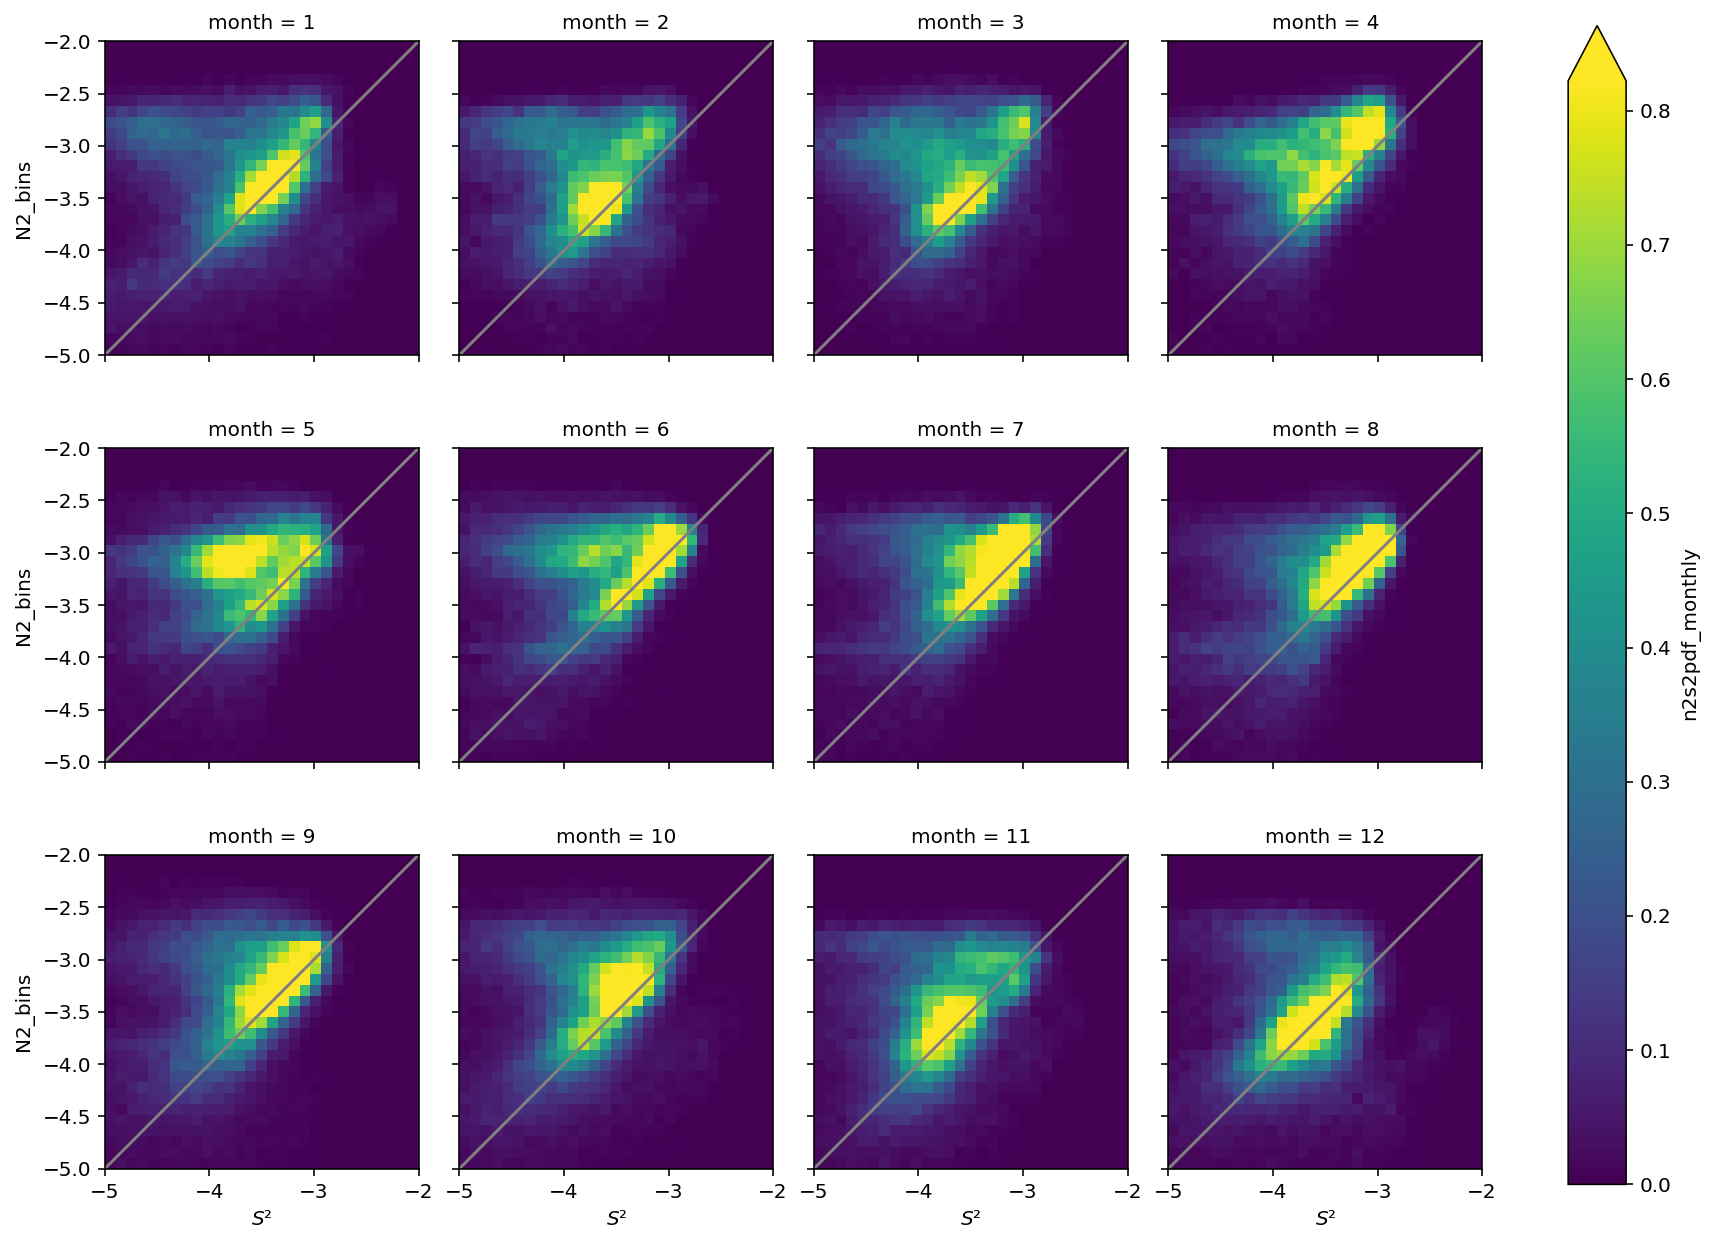

In [ ]:
fg = tao_gridded.n2s2pdf_monthly.plot(col="month", col_wrap=4, robust=True)
fg.map(dcpy.plots.line45)

## Stability Diagram

1. Contours enclose 50%, 75% of the data
2. Colors are for LES
3. White contours are 50%, 75% contours for TAO 0, 140
4. thnk about LES resampling?

### Domain averages vs moorings

Averaging over the domain (red) tightens the scatter plot along the 1:1 line

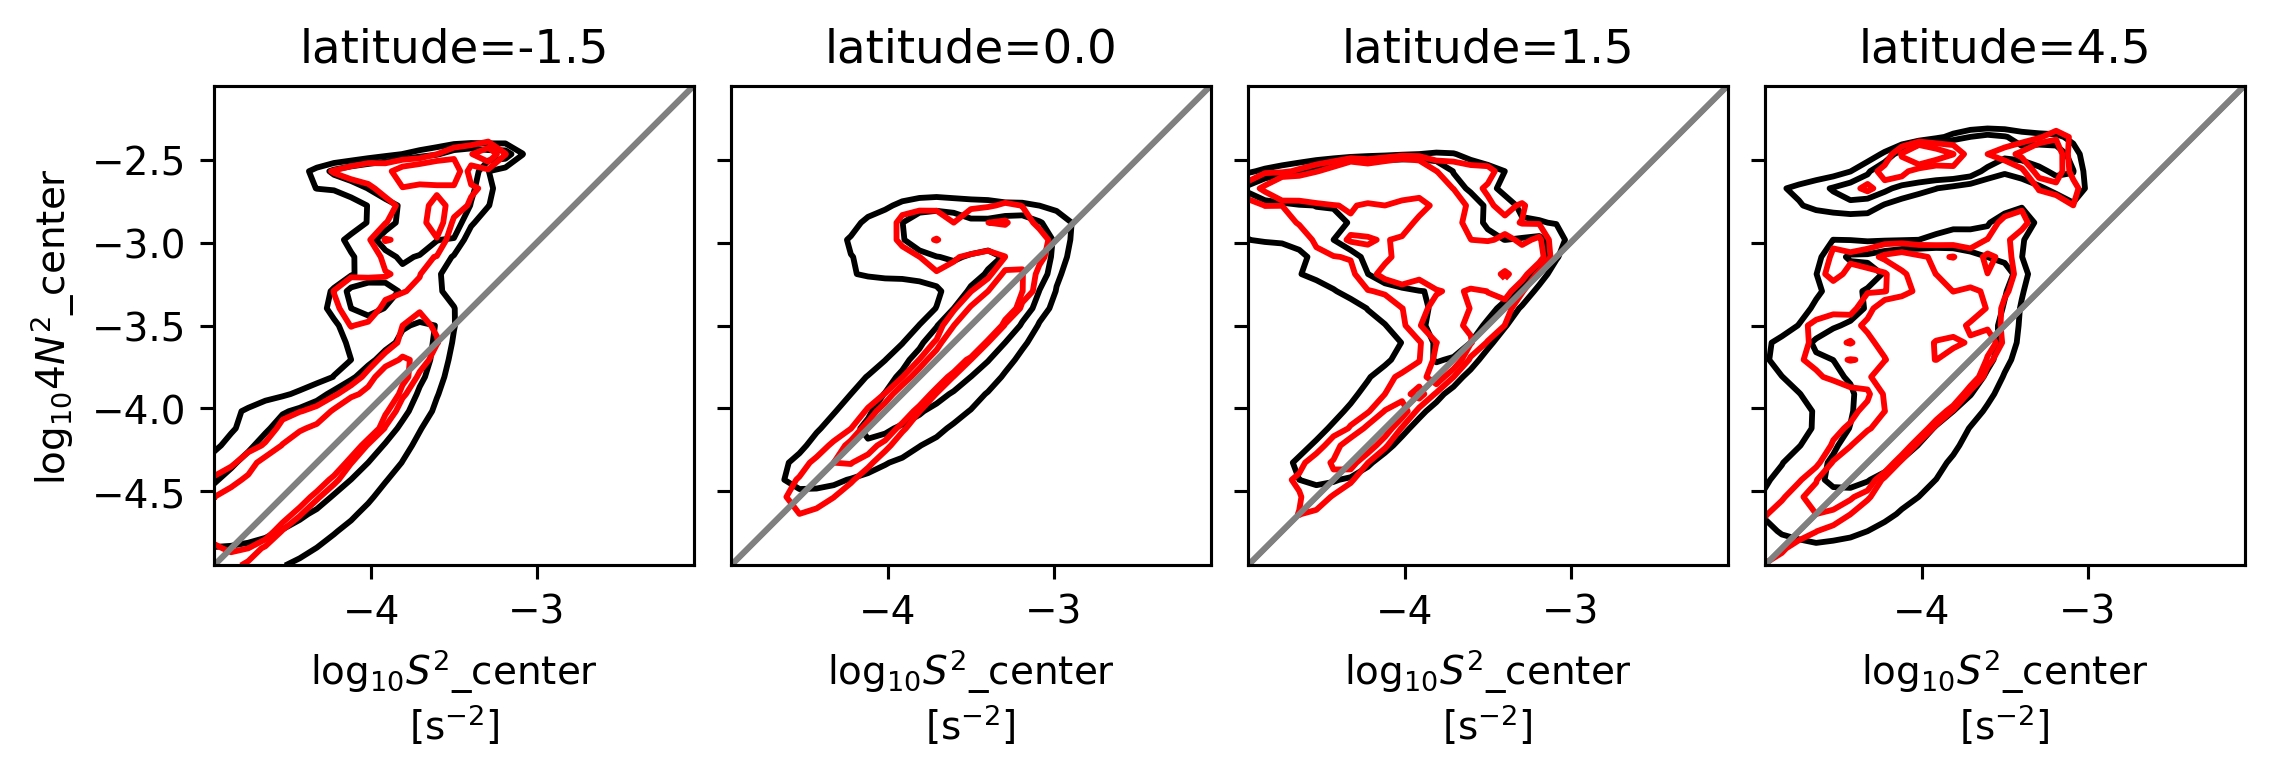

In [ ]:
f, ax = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True)
for lat, axx in zip(moorings.ds["latitude"].data, ax):
    mixpods.plot_n2s2pdf(
        moorings.ds.n2s2pdf.sel(enso_transition_phase="none", latitude=lat), ax=axx, pcolor=False, colors='k'
    )
    mixpods.plot_n2s2pdf(
        avgs.ds.n2s2pdf.sel(enso_transition_phase="none", latitude=lat), ax=axx, pcolor=False, colors='r'
    )
    axx.set_title(f"latitude={lat}")
dcpy.plots.clean_axes(ax)
f.set_size_inches((8, 6))

### vs TAO

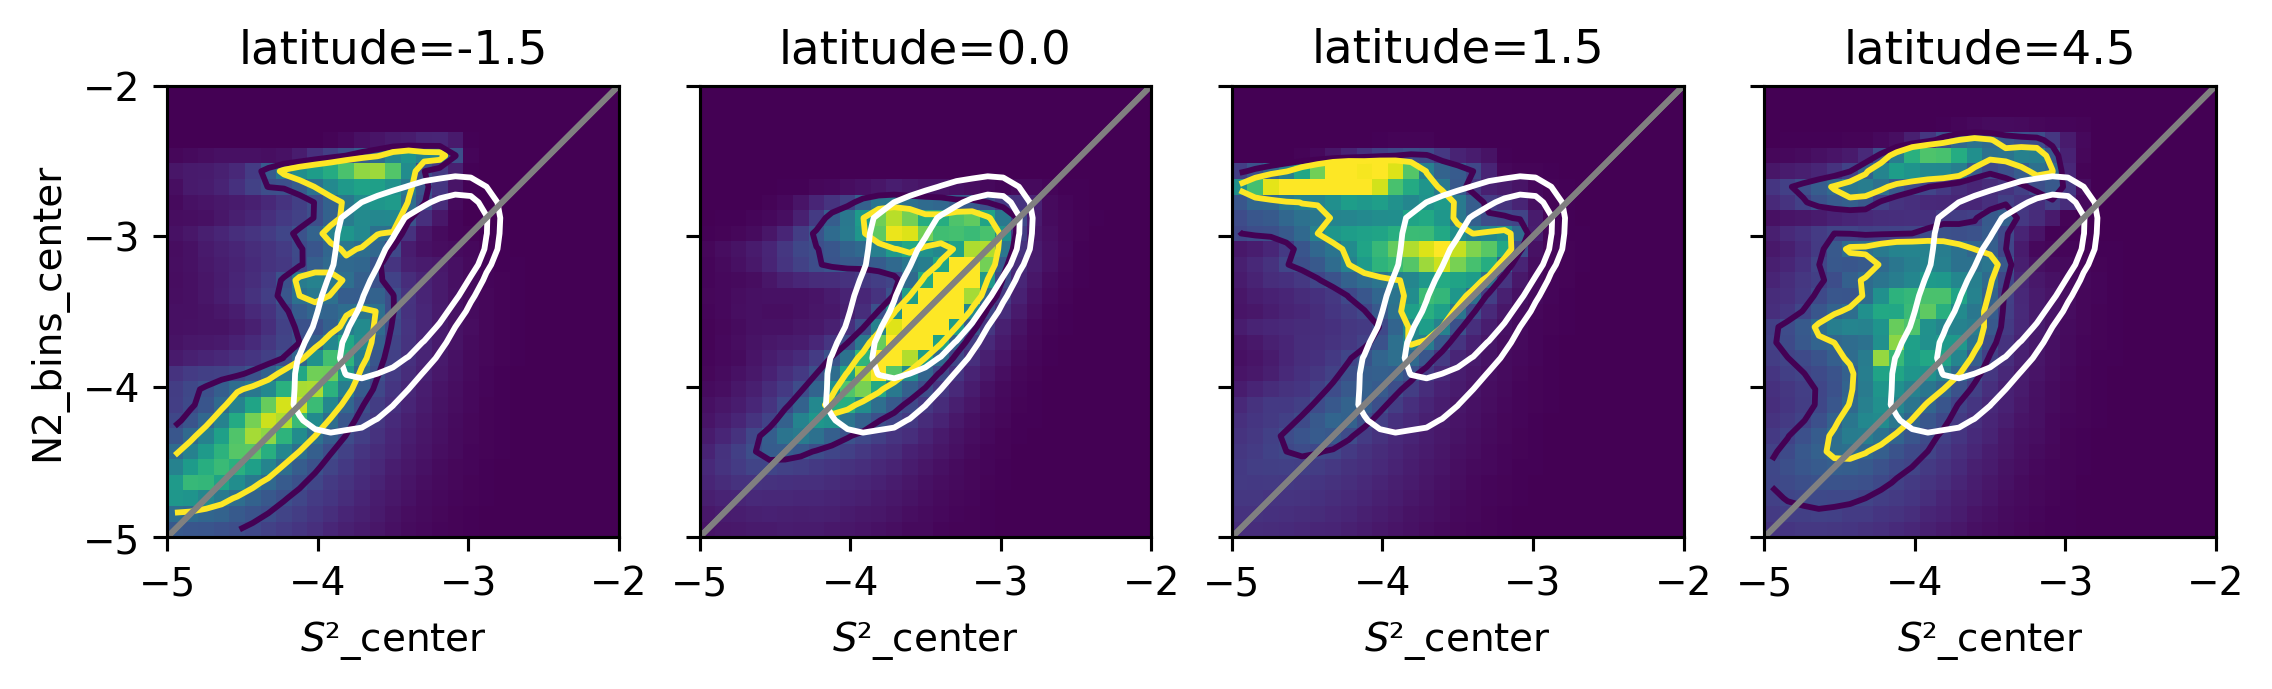

In [ ]:
f, ax = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True)
for lat, axx in zip(moorings.ds["latitude"].data, ax):
    mixpods.plot_n2s2pdf(
        moorings.ds.n2s2pdf.sel(latitude=lat).squeeze(), ax=axx, vmin=0, vmax=0.8, add_colorbar=False, cmap="viridis"
    )
    
    mixpods.plot_n2s2pdf(
        tao_gridded.n2s2pdf.sel(enso_transition_phase="none"), ax=axx, pcolor=False, colors='w'
    )
    axx.set_title(f"latitude={lat}")
dcpy.plots.clean_axes(ax)
f.set_size_inches((8, 6))

## vs TAO in October

Comparing October contours only in TAO makes it look better

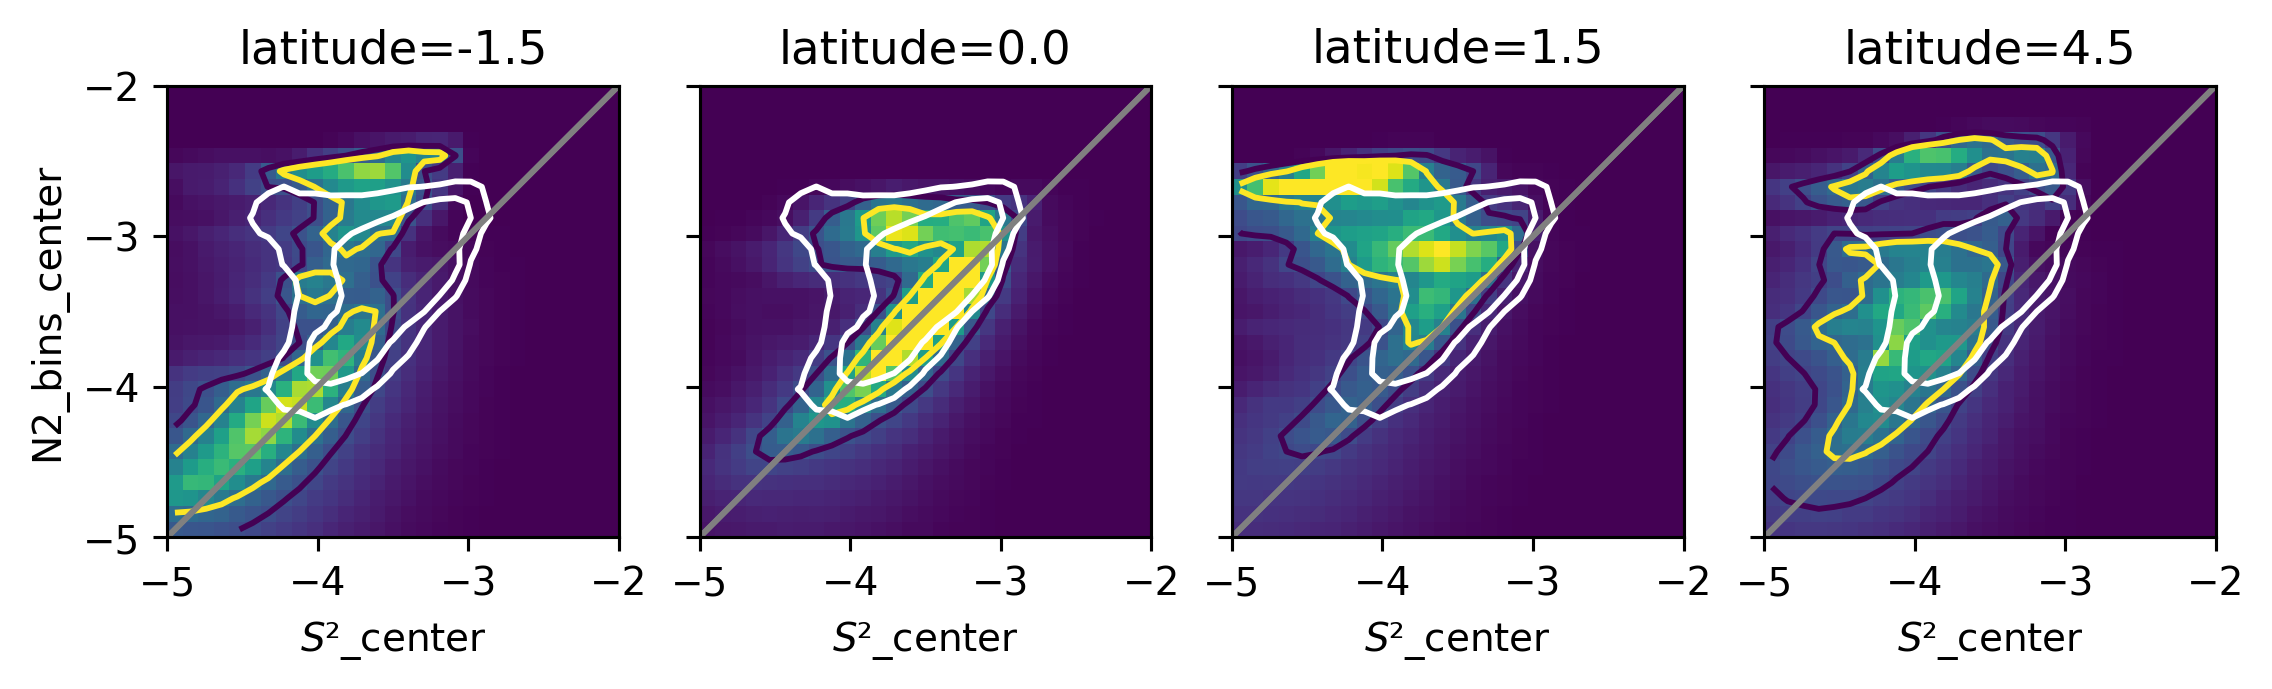

In [ ]:
f, ax = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True)
for lat, axx in zip(moorings.ds.latitude.data, ax):
    mixpods.plot_n2s2pdf(
        moorings.ds.n2s2pdf.sel(latitude=lat).squeeze(), ax=axx, vmin=0, vmax=0.8, add_colorbar=False, cmap="viridis"
    )
    
    mixpods.plot_n2s2pdf(
        tao_gridded.n2s2pdf_monthly.sel(month=10), ax=axx, pcolor=False, colors='w'
    )
    axx.set_title(f"latitude={lat}")
dcpy.plots.clean_axes(ax)
f.set_size_inches((8, 6))

Here is TAO 0, 140 by itself

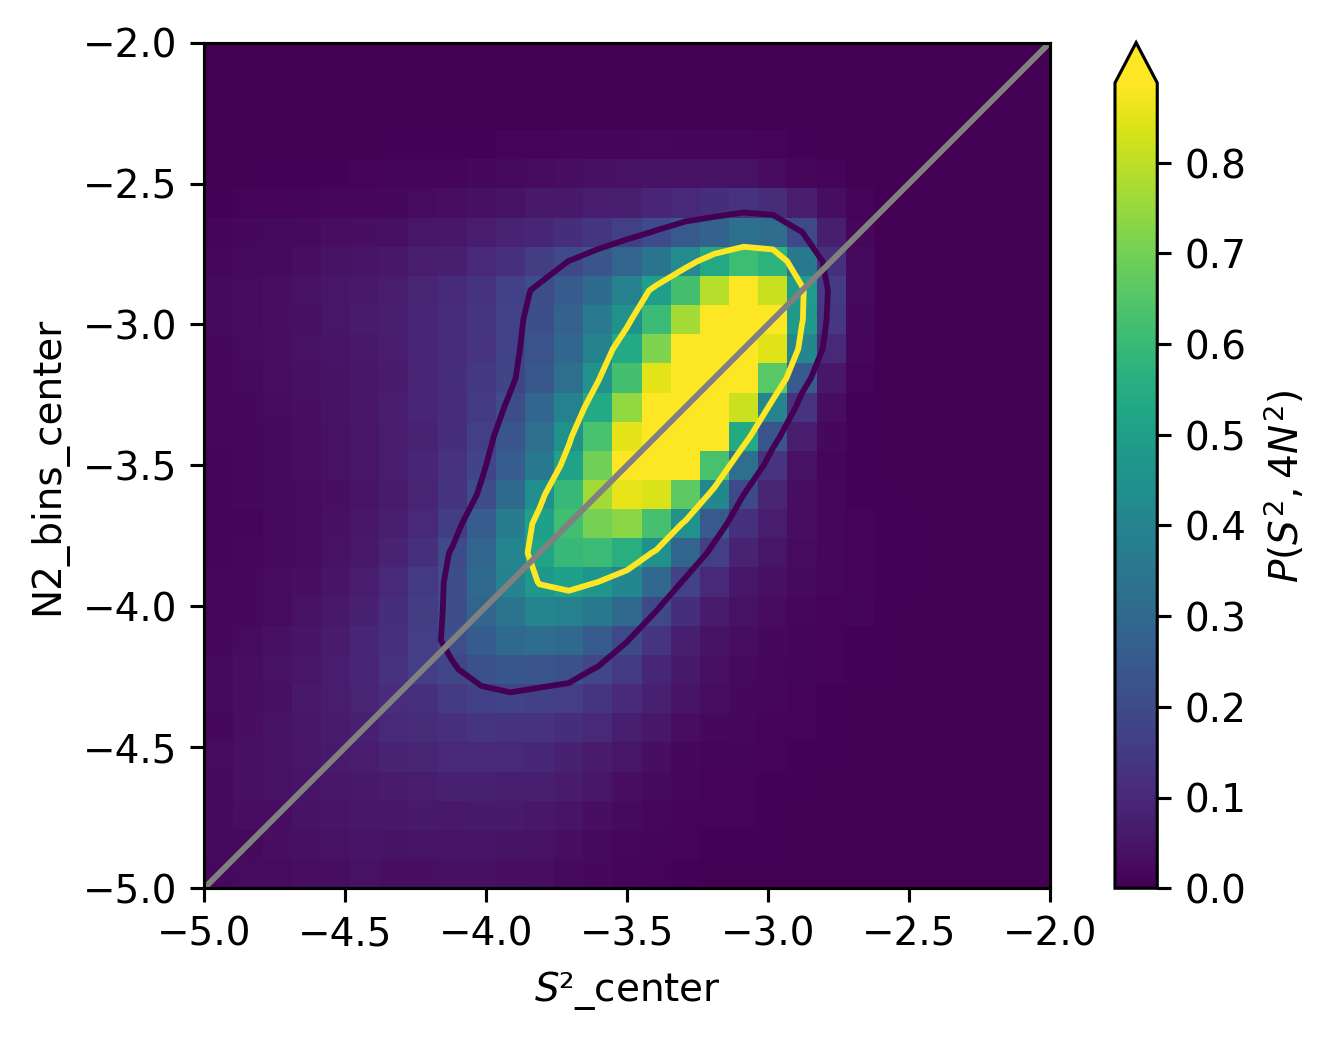

In [ ]:
mixpods.plot_n2s2pdf(
        tao_gridded.n2s2pdf.sel(enso_transition_phase="none"),
    )

## vs EQUIX

In [ ]:
moorings = moorings.assign(
    {"epsilon": lambda ds: (15/4 * ds.nu_sgs * ds.S2) if "nu_sgs" in ds else xr.DataArray([0])}
)
del moorings.ds["epsilon"]
moorings

DataTree('None', parent=None)
│   Dimensions:                (latitude: 4, enso_transition_phase: 1, N2_bins: 29,
│                               S2_bins: 29)
│   Coordinates:
│       dz                     float64 0.5
│       longitude              int64 140
│     * latitude               (latitude) float64 -1.5 0.0 1.5 4.5
│     * enso_transition_phase  (enso_transition_phase) object 'none'
│     * N2_bins                (N2_bins) object (-5.0, -4.896551724137931] ... (-...
│     * S2_bins                (S2_bins) object (-5.0, -4.896551724137931] ... (-...
│       bin_areas              (N2_bins, S2_bins) float64 0.0107 0.0107 ... 0.0107
│       variable               <U7 'n2s2pdf'
│   Data variables:
│       n2s2pdf                (latitude, enso_transition_phase, N2_bins, S2_bins) float64 ...
├── DataTree('4.5.140.oct.mooring.month')
│       Dimensions:                (z: 288, time: 35659, enso_transition_phase: 1,
│                                   N2_bins: 29, S2_bins: 29)
│       Coordinates:
│         * z                      (z) float64 -143.5 -143.0 -142.5 ... -1.0 -0.5 0.0
│         * time                   (time) datetime64[ns] 1985-10-02T06:02:25.39580035...
│           dz                     float64 0.5
│           longitude              int64 140
│           latitude               float64 4.5
│         * enso_transition_phase  (enso_transition_phase) object 'none'
│         * N2_bins                (N2_bins) object (-5.0, -4.896551724137931] ... (-...
│         * S2_bins                (S2_bins) object (-5.0, -4.896551724137931] ... (-...
│           bin_areas              (N2_bins, S2_bins) float64 0.0107 0.0107 ... 0.0107
│       Data variables: (12/24)
│           u                      (time, z) float32 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           v                      (time, z) float32 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           w                      (time, z) float32 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           temp                   (time, z) float32 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           salt                   (time, z) float32 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           nu_sgs                 (time, z) float32 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           ...                     ...
│           N2                     (time, z) float64 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           shred2                 (time, z) float64 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           Ri                     (time, z) float64 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│           eucmax                 (time) float64 -110.0 -110.0 -110.0 ... -123.5 -123.5
│           n2s2pdf                (enso_transition_phase, N2_bins, S2_bins) float64 dask.array<chunksize=(1, 29, 29), meta=np.ndarray>
│           epsilon                (time, z) float32 dask.array<chunksize=(35659, 288), meta=np.ndarray>
│       Attributes:
│           type:                    DIABLO LES, processed virtual mooring
│           title:                   ROMS_PSH_6HRLIN_4.5N140W_360x360x288_23NOV2021_m...
│           intake_esm_varname:      ('u', 'v', 'w', 'temp', 'salt', 'nu_sgs', 'kappa...
│           intake_esm_dataset_key:  4.5.140.oct.mooring.month
├── DataTree('0.0.140.oct.mooring.month')
│       Dimensions:                (z: 216, time: 15342, enso_transition_phase: 1,
│                                   N2_bins: 29, S2_bins: 29)
│       Coordinates:
│         * z                      (z) float64 -107.5 -107.0 -106.5 ... -1.0 -0.5 0.0
│         * time                   (time) datetime64[ns] 1985-10-02T06:01:13.84522844...
│           dz                     float64 0.5
│           longitude              int64 140
│           latitude               float64 0.0
│         * enso_transition_phase  (enso_transition_phase) object 'none'
│         * N2_bins                (N2_bins) object (

In [ ]:
moorings.ds["epsilon"] = (
    to_dataset(
    extract(clear_root(moorings), "epsilon"),
    dim="latitude"
    ).to_array()
    .squeeze()
)

dz
longitude
latitude
enso_transition_phase
N2_bins
S2_bins
bin_areas
variable
n2s2pdf


In [ ]:
avgs.ds["epsilon"] = (
    to_dataset(
    extract(clear_root(avgs), "epsilon"),
    dim="latitude"
    ).to_array()
    .squeeze()
)

dz
longitude
latitude
enso_transition_phase
N2_bins
S2_bins
bin_areas
variable
n2s2pdf


## Build Catalog

Using ecgtools

Dan:
> (100 W is grid point “1402” and 165 W is grid point “102”; 140W is “602” first date
“25MAY1985” indicates first simulated date; second date 24NOV2021 is the nominal date I started the runs):

In [ ]:
import glob
import pathlib

import ecgtools
import intake
import intake_esm
import xarray as xr

In [ ]:
root = (
    "/glade/p/cgd/oce/people/dwhitt/TPOS/"
    "tpos_LES_runs_setup_scripts/tpos-DIABLO/diablo_2.0/post_process/diablo_analysis"
)

In [ ]:
def parse_les_file(path):
    path = pathlib.Path(path)
    split = path.stem.split("_")
          
    # print(split)
    # print(path)
    
    if split[3] == "242":
        length = "5-day"
        kind = "average"
        longitude = int(-165 + (int(split[4]) - 102)* 0.05)
        latitude = 0
    else:
        length = "month"
        kind = "mooring" if "mooring" in split[-1] else "average"
        longitude = -1 * int(split[3][-4:-1])
        latitude = float(split[3][:-5]) * (-1 if "S" in split[3] else 1)

    with xr.open_dataset(path) as ds:
        info = {
            "length": length,
            "kind": kind,
            "longitude": longitude,
            "latitude": latitude,
            "month": "may" if "MAY" in split[-2] else "oct",
            "path": path,
            "variables": [k for k in ds],

        }
    return info

parse_les_file(f"{root}/ROMS_PSH_6HRLIN_0N140W_360x360x216_22OCT2020.nc")


{'length': 'month',
 'kind': 'average',
 'longitude': -140,
 'latitude': 0.0,
 'month': 'oct',
 'path': PosixPath('/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_runs_setup_scripts/tpos-DIABLO/diablo_2.0/post_process/diablo_analysis/ROMS_PSH_6HRLIN_0N140W_360x360x216_22OCT2020.nc'),
 'variables': ['ume',
  'vme',
  'tempme',
  'saltme',
  'urms',
  'vrms',
  'wrms',
  'temprms',
  'saltrms',
  'uw',
  'vw',
  'saltw',
  'tempw',
  'nududz',
  'nudvdz',
  'kappadsdz',
  'kappadtdz',
  'dTdtSOLAR',
  'dTdtRESTORE',
  'dTdtFORCE',
  'dUdtRESTORE',
  'dUdtFORCE',
  'dVdtRESTORE',
  'dVdtFORCE',
  'epsilon',
  'N2',
  'S2',
  'RIG',
  'nududztop',
  'nudvdztop',
  'kappadsdztop',
  'kappadtdztop',
  'nududzbot',
  'nudvdzbot',
  'kappadsdzbot',
  'kappadtdzbot',
  'alpha',
  'beta',
  'T0',
  'S0',
  'rho0']}

In [ ]:
builder = ecgtools.Builder(
    root, 
    exclude_patterns=[
        "*test*", 
        "*irene_*", 
        "*spectra*", 
        "*fixedeps*", 
        "*timeavg*", 
        "*0N140W*5OCT202*", 
        "*0N140W*20OCT202*", 
        "*0N140W*29OCT202*", 
        "*6mavg*",
        "*54x54*",
    ], 
    njobs=-1,
)
builder.build(parse_les_file)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   15.7s finished


Builder(root_path=PosixPath('/glade/p/cgd/oce/people/dwhitt/TPOS/tpos_LES_runs_setup_scripts/tpos-DIABLO/diablo_2.0/post_process/diablo_analysis'), extension='.nc', depth=0, exclude_patterns=['*test*', '*irene_*', '*spectra*', '*fixedeps*', '*timeavg*', '*0N140W*5OCT202*', '*0N140W*20OCT202*', '*0N140W*29OCT202*', '*6mavg*', '*54x54*'], njobs=-1)

### Summarize catalog

In [ ]:
builder.df.drop('variables', axis=1).groupby(["length", "kind", "latitude", "longitude", "month"]).count()

path
length kind    latitude longitude month      
5-day  average  0.0     -165      may       1
                                  oct       1
                        -160      may       1
                                  oct       1
                        -155      may       1
                                  oct       1
                        -150      may       1
                                  oct       1
                        -145      may       1
                                  oct       1
                        -140      may       1
                        -135      may       1
                                  oct       1
                        -130      may       1
                                  oct       1
                        -125      may       1
                                  oct       1
                        -120      may       1
                                  oct       1
                        -115      may       1
                                  oct       1
                        -110      may       1
                                  oct       1
                        -105      may       1
                                  oct       1
                        -100      may       1
                                  oct       1
month  average -1.5     -140      oct       1
                0.0     -140      oct       1
                1.5     -140      oct       1
                3.0     -140      oct       1
                4.5     -140      oct       1
       mooring -1.5     -140      oct       1
                0.0     -140      oct       1
                1.5     -140      oct       1
                4.5     -140      oct       1

In [ ]:
builder.save(
    "../catalogs/pump-les-catalog.csv",
    path_column_name="path",
    variable_column_name="variables",
    data_format="netcdf",
    groupby_attrs=["latitude", "longitude", "month", "kind", "length"],
    aggregations=[
        {'type': 'union', 'attribute_name': 'variables'},
        {'type': 'join_new', 'attribute_name': 'latitude'},
        {'type': 'join_new', 'attribute_name': 'longitude'},
    ]
)

Saved catalog location: ../catalogs/pump-les-catalog.json and ../catalogs/pump-les-catalog.csv


In [ ]:
import ast
from datatree import DataTree

catalog = intake.open_esm_datastore(
    "../catalogs/pump-les-catalog.json", 
    csv_kwargs={"converters": {"variables": ast.literal_eval}},
)
catalog.df

In [ ]:
dataset_dict = catalog.to_dataset_dict(cdf_kwargs={})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'latitude.longitude.month.kind.length'


In [ ]:
tree = DataTree.from_dict(dataset_dict)

In [ ]:
tree["-140.may"].ds

<xarray.Dataset>
Dimensions:       (z: 288, time: 1313, longitude: 1, month: 1)
Coordinates:
  * z             (z) float64 -143.5 -143.0 -142.5 ... -1.0 -0.5 9.969e+36
  * time          (time) datetime64[ns] 1985-05-25T03:00:00 ... 1985-05-30T00...
  * month         (month) <U3 'may'
  * longitude     (longitude) int64 -140
Data variables: (12/41)
    ume           (longitude, month, time, z) float32 dask.array<chunksize=(1, 1, 1313, 288), meta=np.ndarray>
    vme           (longitude, month, time, z) float32 dask.array<chunksize=(1, 1, 1313, 288), meta=np.ndarray>
    tempme        (longitude, month, time, z) float32 dask.array<chunksize=(1, 1, 1313, 288), meta=np.ndarray>
    saltme        (longitude, month, time, z) float32 dask.array<chunksize=(1, 1, 1313, 288), meta=np.ndarray>
    urms          (longitude, month, time, z) float32 dask.array<chunksize=(1, 1, 1313, 288), meta=np.ndarray>
    vrms          (longitude, month, time, z) float32 dask.array<chunksize=(1, 1, 1313, 288), meta=np.ndarray>
    ...            ...
    kappadtdzbot  (longitude, month, time) float32 dask.array<chunksize=(1, 1, 1313), meta=np.ndarray>
    alpha         (longitude, month) float64 0.0002976
    beta          (longitude, month) float64 -0.0007386
    T0            (longitude, month) float64 25.0
    S0            (longitude, month) float64 35.25
    rho0          (longitude, month) float64 1.024e+03
Attributes:
    type:                    DIABLO LES, processed means
    title:                   ROMS_PSH_6HRLIN_0N140W_360x360x288_5OCT2021
    history:                 Tue Dec 28 09:09:16 2021: ncatted -O -a units,ti...
    NCO:                     netCDF Operators version 4.9.5 (Homepage = http:...
    intake_esm_varname:      ('ume', 'vme', 'tempme', 'saltme', 'urms', 'vrms...
    intake_esm_dataset_key:  -140.may